In [21]:
# Importing necessary libraries for data handling, mathematical operations, and plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

In [22]:
# Einlesen des Trainingdatensatzes ohne Lücken
url_train = "https://raw.githubusercontent.com/FabsenMc/bakery_prediction/main/0_DataPreparation/train_data_no_missing_data.csv"
train_data_nmd = pd.read_csv(url_train, usecols=['Datum', 'Warengruppe', 'Temperatur_Kategorie', 'Jahreszeit_FSHW', 'FerienSH', 'Feiertag', 'Weihnachtsmarkt', 'Wochenende', 'Umsatz'])

df = train_data_nmd

df.head()

df = df.drop('Datum', axis=1)

# Definieren Sie ein Mapping von den alten zu den neuen Werten
mapping = {'Hoch': 3, 'Mittel': 2, 'Niedrig': 1}

# Wenden Sie das Mapping auf die Spalte an
df['Temperatur_Kategorie'] = df['Temperatur_Kategorie'].map(mapping)
df['Temperatur_Kategorie'] = df['Temperatur_Kategorie'].fillna(0.0)
df['Temperatur_Kategorie'] = df['Temperatur_Kategorie'].astype('int64')

df.head(10)

,Warengruppe,Umsatz,FerienSH,Feiertag,Weihnachtsmarkt,Wochenende,Jahreszeit_FSHW,Temperatur_Kategorie
0,1,148.828353,1,0,0,0,2,2
1,2,535.856285,1,0,0,0,2,2
2,3,201.198426,1,0,0,0,2,2
3,4,65.890169,1,0,0,0,2,2
4,5,317.475875,1,0,0,0,2,2
5,5,383.628682,1,0,0,0,2,2
6,4,74.543917,1,0,0,0,2,2
7,3,265.261254,1,0,0,0,2,2
8,2,546.780787,1,0,0,0,2,2
9,1,159.793757,1,0,0,0,2,2


In [23]:
# Importieren der benötigten Bibliotheken
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

# Erstellen des Interaktionsterms
df['jahreszeit_fshw_temperatur_Kategorie'] = df['Jahreszeit_FSHW'] * df['Temperatur_Kategorie']

df = df.drop('Jahreszeit_FSHW', axis=1)
# df = df.drop('Temperatur_Kategorie', axis=1)


# Definieren der unabhängigen Variablen (Features) und der abhängigen Variable (Ziel)
X = df.drop('Umsatz', axis=1)
y = df['Umsatz']

# Aufteilen der Daten in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Erstellen und Trainieren des linearen Regressionsmodells
model = LinearRegression()
model.fit(X_train, y_train)

# Vorhersagen auf den Testdaten machen
predictions = model.predict(X_test)

# Ausgabe der Modellparameter
print(f'Koeffizienten: {model.coef_}')
print(f'y-Achsenabschnitt: {model.intercept_}')

# Berechnung des Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

X_test.head(3)

Koeffizienten: [ -3.26112187  55.01723054  95.80395857 -22.16496255  51.55208333
  35.7793084   -1.17029243]
y-Achsenabschnitt: 136.84392842211255
Mean Squared Error: 19272.93891331565


,Warengruppe,FerienSH,Feiertag,Weihnachtsmarkt,Wochenende,Temperatur_Kategorie,jahreszeit_fshw_temperatur_Kategorie
2338,3,0,0,0,1,2,6
6886,4,0,0,0,0,2,2
5861,3,0,0,0,0,3,9


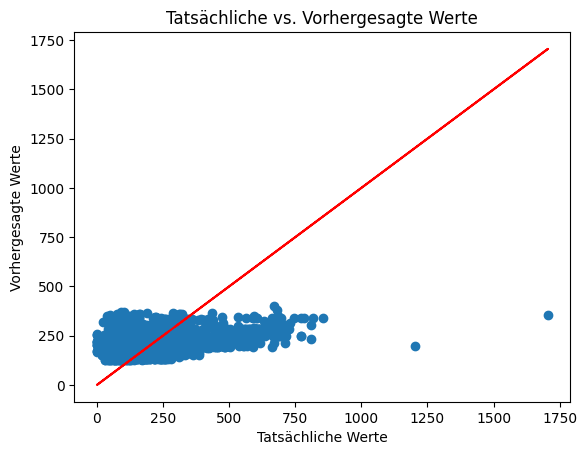

In [24]:
import matplotlib.pyplot as plt

# Erstellen Sie ein Streudiagramm der tatsächlichen gegen die vorhergesagten Werte
plt.scatter(y_test, predictions)
plt.xlabel('Tatsächliche Werte')
plt.ylabel('Vorhergesagte Werte')
plt.title('Tatsächliche vs. Vorhergesagte Werte')

# Zeichnen Sie eine Linie für die perfekte Vorhersage
plt.plot(y_test, y_test, color='red')

plt.show()

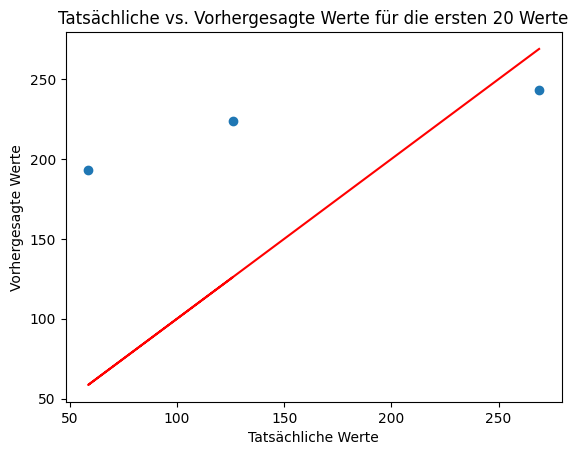

In [25]:
# Erstellen Sie ein Streudiagramm der tatsächlichen gegen die vorhergesagten Werte für die ersten 3 Werte
plt.scatter(y_test.head(3), predictions[:3])
plt.xlabel('Tatsächliche Werte')
plt.ylabel('Vorhergesagte Werte')
plt.title('Tatsächliche vs. Vorhergesagte Werte für die ersten 20 Werte')

# Zeichnen Sie eine Linie für die perfekte Vorhersage
plt.plot(y_test.head(3), y_test.head(3), color='red')

plt.show()